In [1]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import importlib.util


# Get current path from where script is executed
if os.name == 'nt':
    sep = '\\'
elif os.name == 'posix':
    sep = '/'
else:
    print(f'What is this OS? {os.name}')

path = os.getcwd()
path_datasets = path[:-len(f'Code{sep}src{sep}project_CSP_MATH_571')] + f'DataSets{sep}trips{sep}'


#MapGenerator Lib
path_maps = path + f'{sep}mapGeneration{sep}mapGeneration.py'
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)

'Commit ha'


### Load Data 

In [2]:
# Read csv
datasets = os.listdir(path_datasets)

df_list = []
for dataset in datasets:
    if dataset[-4:] == '.csv':
        df = pd.read_csv(path_datasets + dataset, index_col=None, header=0)
        df_list.append(df)


# Merge Taxis Data
df = pd.concat(df_list, axis=0, ignore_index=True)

del(df_list)

#df1 = pd.read_csv(path_datasets + 'jan-ap19.csv', delimiter=',')
#df2 = pd.read_csv(path_datasets + 'may-nov19.csv', delimiter=',')

# Merge Taxis Data of 2019
#df = pd.concat([df1,df2], axis=0, ignore_index=True)

#del(df1)
#del(df2)

df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ececa29f7a1392f7d937f34a2040f409744d0354,8d1222551aa0783ed24c0941a29222b21fe66e643a801a...,2019-01-17 11:30:00 UTC,2019-01-17 12:00:00 UTC,1363.0,15.50,NaN,NaN,41.0,NaN,...,0.0,38.5,Cash,Flash Cab,41.794090,-87.592311,POINT (-87.592310855 41.794090253),NaN,NaN,NaN
1,1fbf17a48aca428fefc0a79d0218ed729ea7e8e3,c0efb2f0d92d8721d64fcd6628a9f8e78b7693cb5f36ee...,2019-03-02 09:45:00 UTC,2019-03-02 10:45:00 UTC,2754.0,13.73,NaN,NaN,46.0,NaN,...,0.0,37.5,Cash,Flash Cab,41.741243,-87.551428,POINT (-87.551428197 41.7412427285),NaN,NaN,NaN
2,73eab95221395356ad45ce8b7a8716bcddb4c034,5e00ac77728ae1790a517495300680a2ff69fe9a569218...,2019-02-12 11:15:00 UTC,2019-02-12 12:15:00 UTC,3422.0,31.77,NaN,NaN,8.0,NaN,...,0.0,76.5,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
3,701fcdd02b0dd0dc01cbffcd7c2c9572386f5966,e5e1bb9c3329c0f9bd1f291cb9bbbb016731c148fefca8...,2019-02-15 03:30:00 UTC,2019-02-15 03:45:00 UTC,1302.0,10.16,NaN,NaN,8.0,NaN,...,0.0,26.5,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
4,2984246ff88a9e42cb7d80d5a056a91592cd2103,0574d247700e50d1fb996084c8b1c649bf57effe419a6d...,2019-02-27 07:00:00 UTC,2019-02-27 07:45:00 UTC,2308.0,14.26,NaN,NaN,8.0,NaN,...,3.5,41.0,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN


In [3]:
df.shape

(8498882, 23)

For testing: 

In [4]:
df_sampled = df.sample(n=400_000, random_state=1)
df_sampled_a_lot = df.sample(n=1_000, random_state=1)

### Some information about the dataset

In [5]:
qty_taxis = len(df['taxi_id'].drop_duplicates())
print(f'Quantity of taxis: {qty_taxis}')

Quantity of taxis: 1167


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498882 entries, 0 to 8498881
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_key              object 
 1   taxi_id                 object 
 2   trip_start_timestamp    object 
 3   trip_end_timestamp      object 
 4   trip_seconds            float64
 5   trip_miles              float64
 6   pickup_census_tract     float64
 7   dropoff_census_tract    float64
 8   pickup_community_area   float64
 9   dropoff_community_area  float64
 10  fare                    float64
 11  tips                    float64
 12  tolls                   float64
 13  extras                  float64
 14  trip_total              float64
 15  payment_type            object 
 16  company                 object 
 17  pickup_latitude         float64
 18  pickup_longitude        float64
 19  pickup_location         object 
 20  dropoff_latitude        float64
 21  dropoff_longitude       float64

In [7]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'],format=r"%Y-%m-%d %H:%M:%S UTC")
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'],format=r"%Y-%m-%d %H:%M:%S UTC")

### Preprocessing: Missing Values

We are not interested in NaN values in the Target Variable **(pickup_community_area)**

In [8]:
df = df.dropna(subset=['pickup_community_area'])

**Check the below assumption**

In [9]:
df = df.dropna(subset=['dropoff_community_area']) 

In [10]:
df.shape

(7665012, 23)

In [11]:
df.loc[:,'pickup_community_area'] = df.loc[:,'pickup_community_area'].astype('int64')
df.loc[:,'dropoff_community_area'] = df.loc[:,'dropoff_community_area'].astype('int64')

**Drop useless columns**

In [12]:
df = df.drop(columns=['company', 'pickup_latitude','pickup_longitude', 'pickup_location', 'dropoff_latitude',
                       'dropoff_longitude', 'dropoff_location'])

**Checking percentage of missing values**

In [13]:
100 * df.isnull().sum()/df.shape[0]

unique_key                 0.000000
taxi_id                    0.000000
trip_start_timestamp       0.000000
trip_end_timestamp         0.000000
trip_seconds               0.005062
trip_miles                 0.000130
pickup_census_tract       36.525853
dropoff_census_tract      36.525853
pickup_community_area      0.000000
dropoff_community_area     0.000000
fare                       0.000130
tips                       0.000130
tolls                     77.495599
extras                     0.000130
trip_total                 0.000130
payment_type               0.000000
dtype: float64

As we can see in the dataset description, pickup_census_tract and dropoff_census_tract have a high number of missing values due to user privacy, so we delete these columns.

In [14]:
df = df.drop(columns=['pickup_census_tract','dropoff_census_tract'])

#### Tolls

This value shouldn't be missing due to privacy. Let's check the possible values.

In [15]:
df['tolls'].unique()

array([nan,  0.])

In [16]:
df['tolls'].isna().sum()

5940047

'tolls' should be a predictor that indicates if the trip went through a toll. As we can see in the above cell, the values are just 0 or nan. 

Let's get insight in the trips where the values are nan. 

*Time Analysis*

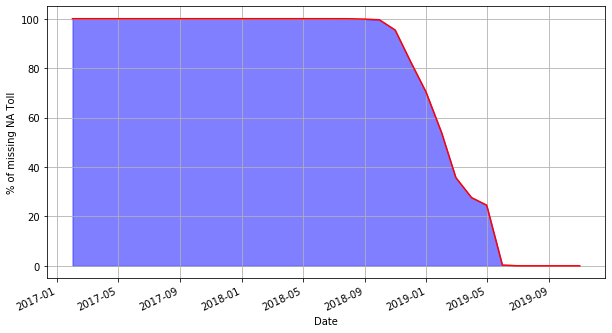

In [20]:
# Randomly group by start timestamp
df.index = df['trip_start_timestamp']
# Total elements
timeStart_grouped = df.groupby(pd.Grouper(freq='M'))
# Total NA elements
timeStart_tollNA_grouped = df.loc[df['tolls'].isna(),].groupby(pd.Grouper(freq='M'))

# Percentaje
y = 100 * timeStart_tollNA_grouped.size()/timeStart_grouped.size()
y = y[~y.isna()]

# Plot
plt.figure(figsize=(10,5))
plt.fill_between(y.index, y, color='blue', alpha=0.5)
plt.plot(y, color='red')
plt.grid()
plt.xticks(rotation=25, ha='right')
plt.xlabel('Date')
plt.ylabel('% of missing NA Toll')

plt.show()

As we can see, a little before 2019 values stopped being NAs. This is probably a new value that was added recently to the dataset.

Let's check the distribution prior to 2019, to see if it's random or maybe only some communities started using it.

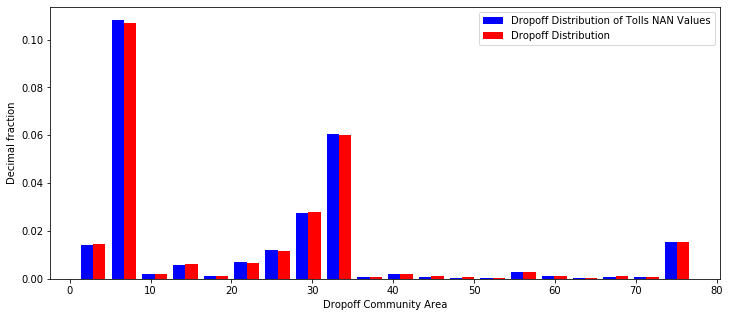

In [17]:
plt.figure(figsize=(12,5))
plt.hist([df.loc[df['tolls'].isna(),'dropoff_community_area']
          , df['dropoff_community_area']]
          , density=True
          , color=['blue','red']
          , label= ['Dropoff Distribution of Tolls NAN Values','Dropoff Distribution']
          , bins=20)

plt.xlabel('Dropoff Community Area')
plt.ylabel('Decimal fraction')
plt.legend()
plt.show()

As we can see in the above plot, the distribution of dropoff in the missing tolls samples is very similar to the whole distribution. Out assumption is that missed tolls is not related to the trip, so these nan values are random and we assume that all values are 0. Therefore this predictor does not provide any information, so we drop it.

Our hypothesis is that since in Chicago there are no many tolls, no taxi uses them.

In [18]:
df = df.drop(columns='tolls')

#### trip_miles, fare, tips, extras & trip_total

Due to the percentage of missing values of these columns is the same, we are going to check if the values are missing in the same rows.

In [19]:
n_missing = (df['trip_miles'].isna()).sum()

In [20]:
n_missing

10

In [21]:
cols_same_na = ['trip_miles','fare','tips','extras','trip_total']

index = df['trip_miles'].isna()
for i in range(1,len(cols_same_na)):
    index &= (df[cols_same_na[i]].isna())

result = 'They are the same rows! :)' if index.sum() == n_missing else "They are different rows :("
print(result)

They are the same rows! :)


As we see all columns missing in the same rows. Since 10 samples in a couple of millions is insignificant, we delete these 10 samples

In [22]:
df = df[~index]

#### trip_seconds

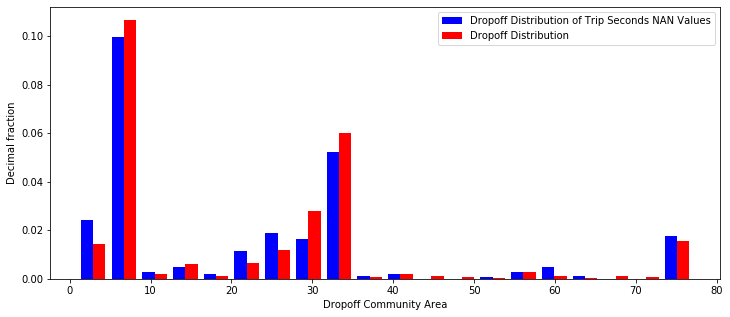

In [23]:
dropCA_tripSecNA = df.loc[df['trip_seconds'].isna(),'dropoff_community_area']
dropCA = df['dropoff_community_area']

plt.figure(figsize=(12,5))
plt.hist([dropCA_tripSecNA,dropCA]
         ,density=True
         ,color=['blue','red']
         ,label=['Dropoff Distribution of Trip Seconds NAN Values','Dropoff Distribution']
         ,bins=20)

plt.xlabel('Dropoff Community Area')
plt.ylabel('Decimal fraction')
plt.legend()
plt.show()

As we can see, the distribution of missing values in this columns seems to be random. We are going to replace them with the mean of similar trips (i.e same pick_up and dropoff community area)

In [24]:
def getMeanTripSeconds(row):
    
    index = (df['pickup_community_area'] == row['pickup_community_area'])
    index &= (df['dropoff_community_area'] == row['dropoff_community_area'])
    mean = df.loc[index,'trip_seconds'].mean()
    
    return mean

In [25]:
estimatedTripSec = df.loc[df['trip_seconds'].isna(),['pickup_community_area','dropoff_community_area']].apply(lambda row : getMeanTripSeconds(row), axis=1)

In [26]:
df.loc[df['trip_seconds'].isna(),'trip_seconds'] = estimatedTripSec

In [27]:
df.isna().sum()

unique_key                0
taxi_id                   0
trip_start_timestamp      0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
extras                    0
trip_total                0
payment_type              0
dtype: int64

### Preprocessing: Check Errors

**Time Consistency**

Check how long trips usually take

*Note: (end-start != duration), because the end and start are rounded to the nearest 15 minutes.*

In [105]:
def checkSecondsConsistency(row):
    
    result = row['trip_end_timestamp']-row['trip_start_timestamp']
    
    return result.seconds == row['trip_seconds']

In [109]:
def checkDifferenceInTripTimestamp(row):
    
    result = row['trip_end_timestamp']-row['trip_start_timestamp']
    
    return result.seconds == 0

In [110]:
df.iloc[:100000].apply(lambda row : checkDifferenceInTripTimestamp(row), axis=1).sum()

36503

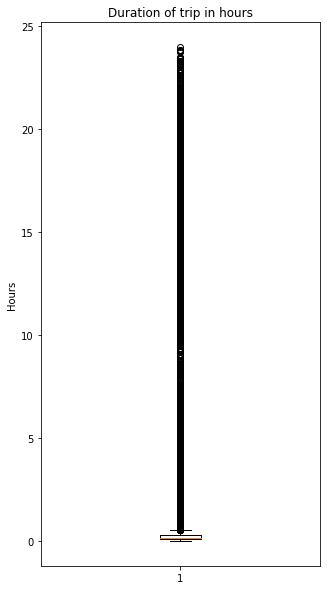

In [118]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(df['trip_seconds']/3600)
ax.set_title('Duration of trip in hours')
ax.set_ylabel('Hours')
plt.show()

We are working with so much data that the outliers won't let visualize correctly the boxplot.
As we can see there are taxi rides that last nearly a full day. However this can be possible. Maybe somebody who wouldn't mind paying lot's of money to get a private car. Of course the best way to ensure this is to contact the company.

In [119]:
q1, q3 = df['trip_seconds'].quantile([0.25, 0.75])
topWhisker = q3+1.5*(q3-q1)
qty = len(df.loc[df['trip_seconds'] > topWhisker,])
print(f'Quantity of outliers (>{topWhisker*60} mins): {qty}\nPercentaje: {round(qty/len(df)*100,2)}%')

hours = 3
qty = len(df.loc[df['trip_seconds'] > hours*3600,])
print(f'Quantity of trips that lasted more than {hours}h: {qty}\nPercentaje: {round(qty/len(df)*100,2)}%')

Quantity of outliers (>116010.0 mins): 630259
Percentaje: 8.22%
Quantity of trips that lasted more than 3h: 2685
Percentaje: 0.04%


Let's check the histogram of outliers:

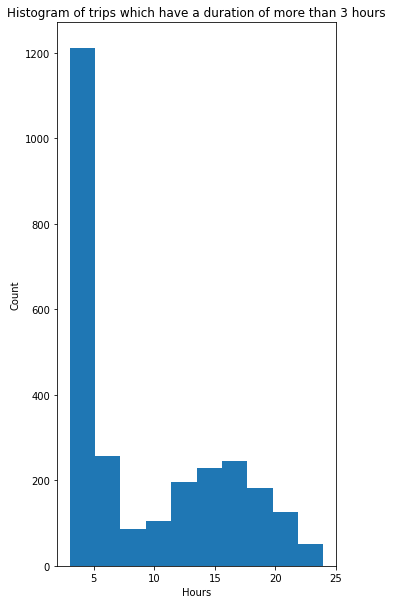

In [120]:
fig, ax = plt.subplots(figsize=(5,10))
ax.hist(df.loc[df['trip_seconds'] > hours*3600,]['trip_seconds']/3600)
ax.set_title(f'Histogram of trips which have a duration of more than {hours} hours')
ax.set_ylabel('Count')
ax.set_xlabel('Hours')
plt.show()

There is a huge decrease on taxi trips that last more than around 5 hours.

Let's visualize the boxplot without the outliers to get a better visualization of tipical values.

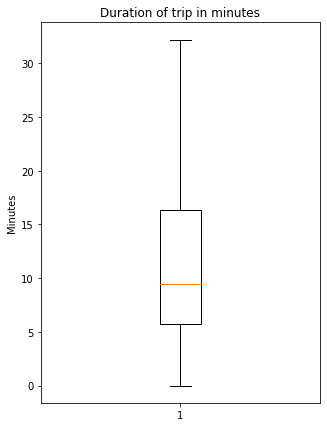

In [121]:
fig, ax = plt.subplots(figsize=(5,7))
ax.boxplot(df['trip_seconds']/60, showfliers=False)
ax.set_title('Duration of trip in minutes')
ax.set_ylabel('Minutes')
plt.show()

As we can see, there are many trips that last less than 10 seconds. Trips that were maybe cancelled? Should we take them off? We are not interested in predicting trips that will be canceled. Where is the correct threshold to assume that a trip was canceled?

**DANI CHECK**

**Miles consistency**

Check average miles in trips

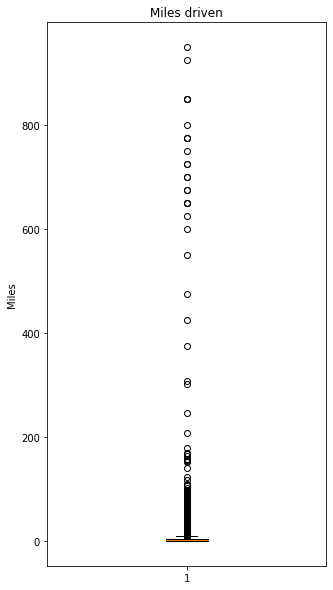

In [122]:
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot(df['trip_miles'])
ax.set_title('Miles driven')
ax.set_ylabel('Miles')
plt.show()

Here we can see there are also many outliers. However, compared to the time, these seem much more concentrated near the top whisker. This make sense. Trips of more than 50 miles in Chicago don't make much sense. It could be interesting to check if long trips durations are correlated with long trips miles.

**CHECK TRIPS DE MAS DE 200??**

Atrvesar Illinois de punta a punta son 250 miles. Chicago tendra unas 30 miles de largo como mucho.

Let's visualize the boxplot without the outliers to get a better visualization of tipical values.

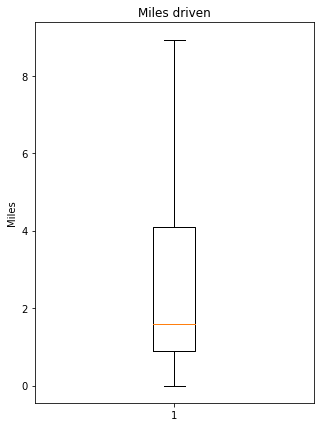

In [195]:
fig, ax = plt.subplots(figsize=(5,7))
ax.boxplot(df['trip_miles'], showfliers=False)
ax.set_title('Miles driven')
ax.set_ylabel('Miles')
plt.show()

**LO mismo THRESHOLD PARA UNA LONGITUD MINIMA? 50m aunque sea**

**Correlation**

- Trips with ++ miles   **&Implies;**  ++ time &emsp; (or at least, if we consider a average speed speed of 20 miles/hour, for every mile, there should be at least 3600/20 seconds)
- Trips with -- miles  **&Implies;** -- time


- Trips with ++ time **&Implies;** ++ miles. *This is not necessarily true. The taxi could have been waiting.*
- Trips with -- time **&Implies;** -- miles.

Check if in average, time corresponds to an aproximate quantity of miles, taking an average speed.

**Una vez más, los outliers se cargan todo**

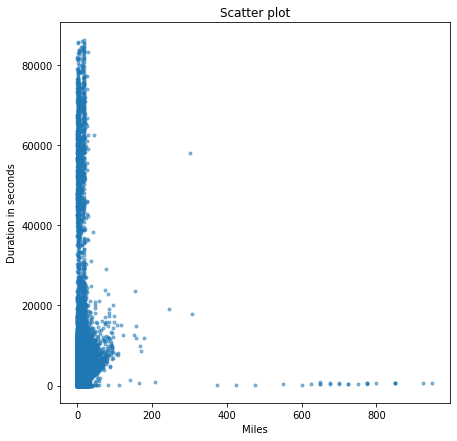

In [143]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['trip_miles'], df['trip_seconds'], marker='.', alpha=0.5)
ax.set_title('Scatter plot')
ax.set_ylabel('Duration in seconds')
ax.set_xlabel('Miles')
plt.show()

Si nos petamos los outliers si hay una relación:

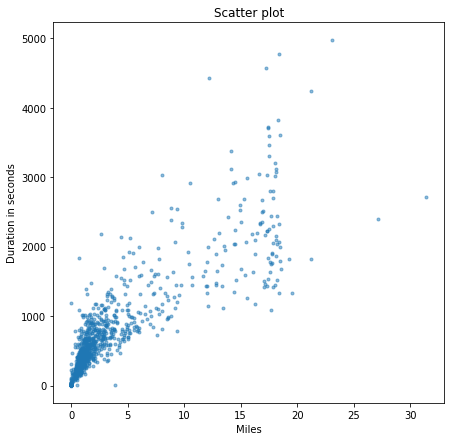

In [142]:
fig, ax = plt.subplots(figsize=(7,7))
df_sampled_a_lot = df_sampled_a_lot.loc[df_sampled_a_lot['trip_seconds'] <10_000,]
ax.scatter(df_sampled_a_lot['trip_miles'], df_sampled_a_lot['trip_seconds'], marker='.', alpha=0.5)
ax.set_title('Scatter plot')
ax.set_ylabel('Duration in seconds')
ax.set_xlabel('Miles')
plt.show()


Hacer lo mismo con 'fare', 'trip_total', tips'
Analizar 'payment_type'


y ya con eso habríamos terminado. Guardar el dataset en binario o csv y volver a abrirlo en otro notebook para unirlo con el weather y holidays limpio para empezar a hacer data analysisç


**KAGGLES TASKS**

(interesante)

- Taxi company usually used in Chicago
- Mode of payment usually used 


- Outliers: Cost, Time...
- Box Plot trip miles by type of 

In [107]:
df.shape

(7665002, 13)

In [102]:
(df['trip_end_timestamp'][2]-df['trip_start_timestamp'][2]).seconds

900

In [103]:
df['trip_seconds'][2]

328.0

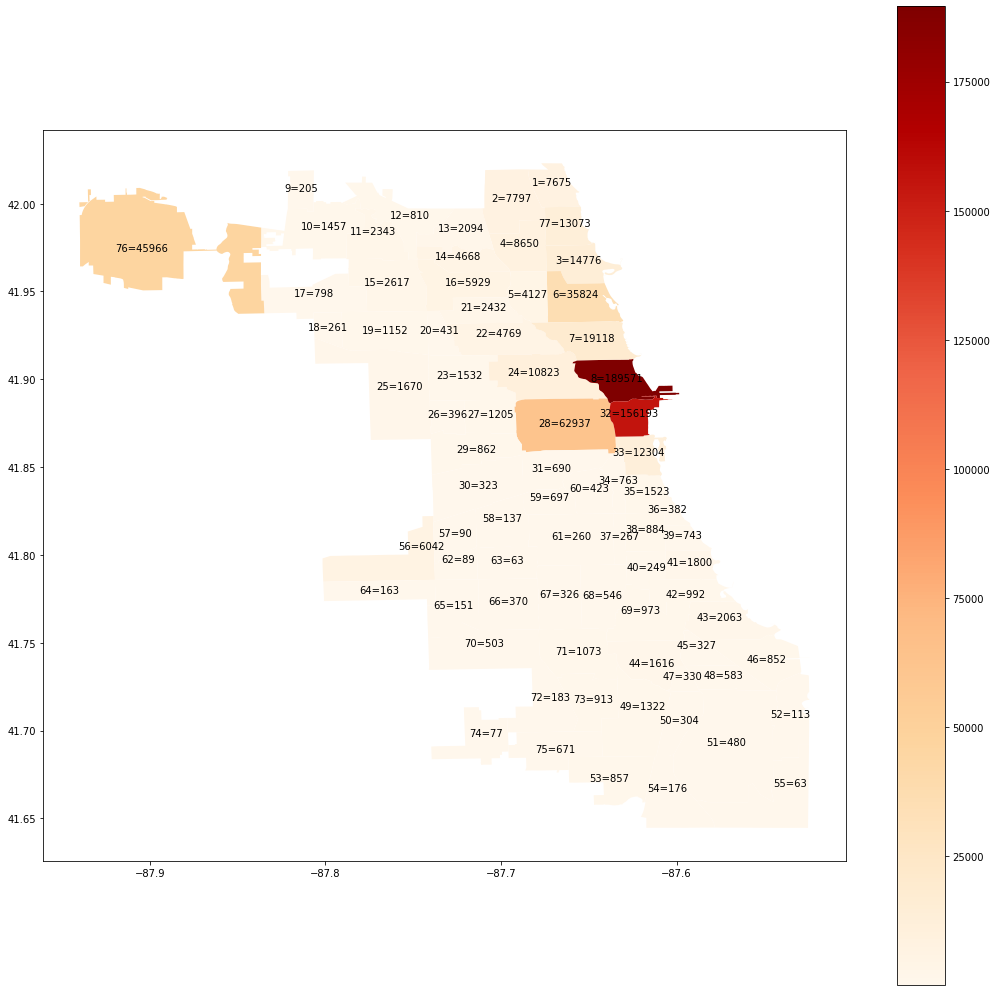

In [13]:
mp.mapGeneratorFromDict(Counter(df_cleaned['pickup_community_area']), cmap=0)


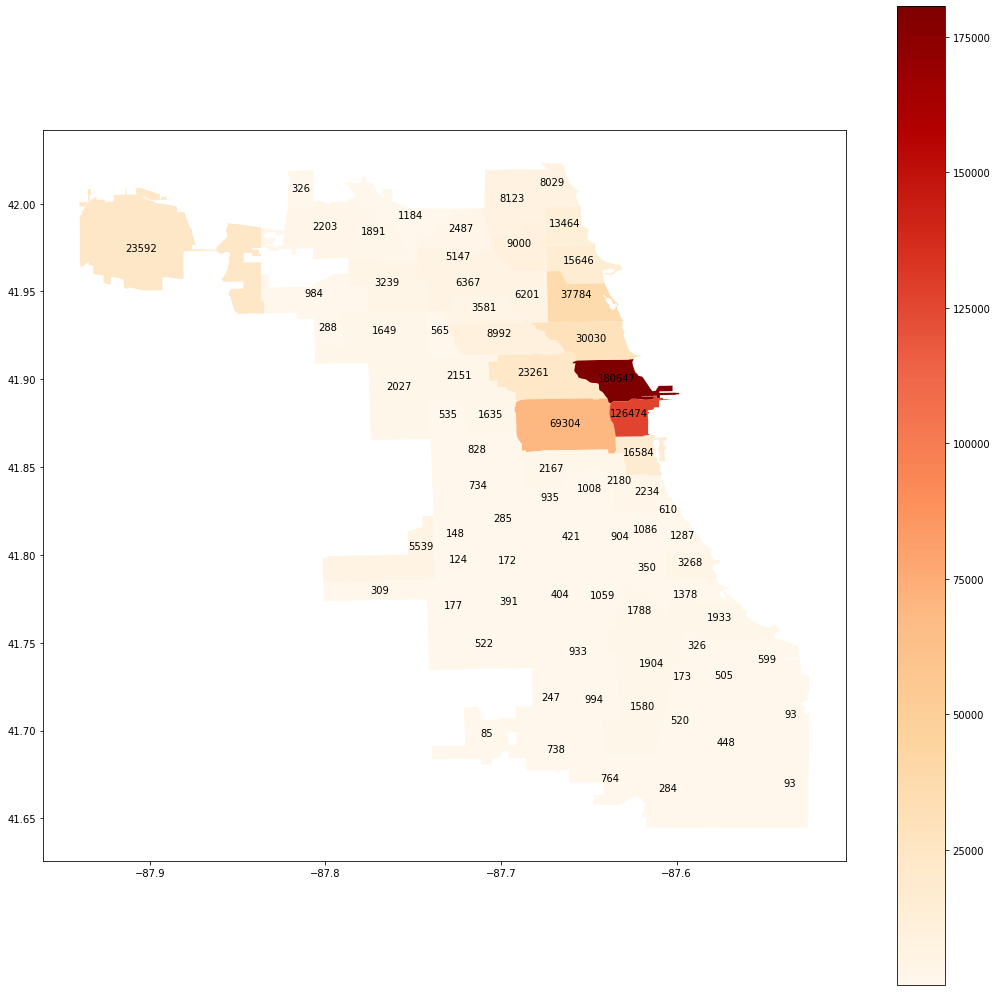

In [14]:
mp.mapGeneratorFromDict(Counter(df_cleaned['dropoff_community_area']), cmap=0)


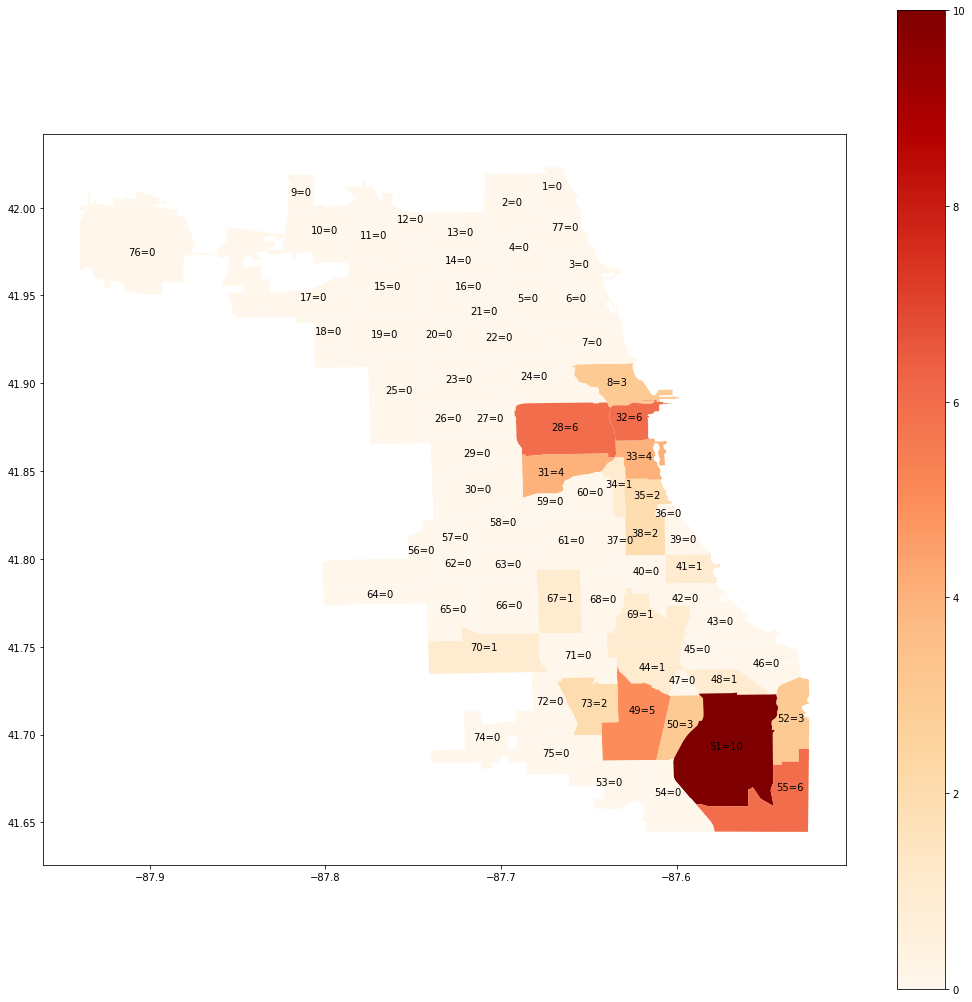

In [27]:
b = df_cleaned.loc[df_cleaned['pickup_community_area'] == 55]
a = Counter(b['dropoff_community_area'])
mp.mapGeneratorFromDict(a, cmap=0)


In [17]:
print(len(df_cleaned.loc[df_cleaned['dropoff_community_area'] != df_cleaned['pickup_community_area']]))
print(len(df_cleaned))

454309
655917


In [8]:
pickups = Counter(df_cleaned['pickup_community_area'])

array = []
counter = 1
while(len(array) < 77):
    # Check if value exists
    if counter in pickups:
        array += [pickups[counter]]
    else:
        array += [0]

    counter += 1
    
print (len(array))

77


In [46]:
for name in dir():
    if not name.startswith('_'):
        print(globals()[name])

<class 'collections.Counter'>
['', 'import os, sys\nimport pandas as pd\nimport math\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom collections import Counter\nimport importlib.util\n\n\n# Get current path from where script is executed\nif os.name == \'nt\':\n    sep = \'\\\\\'\nelif os.name == \'posix\':\n    sep = \'/\'\nelse:\n    print(f\'What is this OS? {os.name}\')\n\npath = os.getcwd()\npath_datasets = path[:-len(f\'Code{sep}src{sep}project_CSP_MATH_571\')] + f\'DataSets{sep}trips{sep}\'\n\n\n#MapGenerator Lib by Alexitoh96\npath_maps = path + f\'{sep}mapGeneration{sep}mapGeneration.py\'\nspec = importlib.util.spec_from_file_location("mapGeneration", path_maps)\nmp = importlib.util.module_from_spec(spec)\nspec.loader.exec_module(mp)', "# Read csv\ndatasets = os.listdir(path_datasets)\n\ndf_list = []\nfor dataset in datasets:\n    if dataset[-4:] == '.csv':\n        df = pd.read_csv(path_datasets + dataset, index_col=None, header=0)\n        df